# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
### Columns Description (characteristics about the patient)
**PatientId :** Identification of a patient.  
**AppointmentID :** Identification of each appointment.  
**Gender :** Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.  
**ScheduledDay :** tells us on what day the patient set up their appointment. The day of the actuall appointment, when they have to visit the doctor.  
**AppointmentDay :** The day someone called or registered the appointment, this is before appointment of course.  
**Age :** How old is the patient.  
**Neighborhood :** indicates the location of the hospital. Where the appointment takes place.  
**Scholarship :** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.  
**Hipertension :** medical history (True or False)  
**Diabetes :** medical history (True or False)  
**Alcoholism :** addiction history (True or False)  
**Handcap :** physical disability (True or False)  
**SMS_received :** 1 or more messages sent to the patient.  
**No-show :** (yes or no). Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.  

### Question(s) for Analysis
- How many people miss their medical appointments?
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?  
- What are the characteristics associated with no-show to appointments?  
- Does medical history, addiction and special disabilities affect the commitment to scheduled appointments?

In [2]:
# Import statements for all of the packages that you i plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
# Including a 'magic word' so that my visualizations are plotted inline with the notebook.
%matplotlib inline

In [3]:
# Upgrade pandas and ipykernel versions.
!pip install --upgrade pandas==0.25.1
!pip install --upgrade ipykernel==5.1.2

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)
Requirement already up-to-date: ipykernel==5.1.2 in /opt/conda/lib/python3.6/site-packages (5.1.2)


<a id='wrangling'></a>
## Data Wrangling
> **1- Loading Data**  
> **2- Assessing Data**  
> **3- Cleaning Data**  

### Loading Data

In [4]:
# Load your data and print out a few lines.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Assessing Data
**1- Investigating the number of samples in the dataset**  
**2- Investigating number of columns in the dataset**  
**3- Checking for duplicate rows in the dataset**  
**4- Checking datatypes of columns to verify that the data is in the right format**  
**5- Checking columns/ characteristics with missing values**  
**6- Checking the number of no-nnull unique values for characteristics in dataset**  
**7- Investigating what are those unique values are and counts for specific columns to verify that they have the right values**

In [5]:
# Number of samples in dataset
df.shape[0]

110527

In [6]:
# Number of columns in dataset
df.shape[1]

14

In [7]:
# Duplicate rows in dataset
df.duplicated().sum()

0

**Great! There are no duplicated rows in the dataset.**

In [8]:
# Datatypes of columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

**Everything seem to be in the right datatype except for ScheduledDay & AppointmentDay.**  
Also, columns labels need some formatting and spelling check.

In [9]:
# Columns/ characteristics with missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Great! There are no null values in the dataset.**

In [10]:
# Number of non-null unique values for characteristics in dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
# Unique values for "Age" and counts for each
print(df.Age.unique())
df.Age.value_counts()

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

**There seem to be wrong values in this column as age can't be a negative value or zero.**
- the negative value could be a typo.
- the zero values could be missing data or new-born, but we need to further investigate those values to understand what they mean.

In [12]:
# Investigating the zero values in Age column to understand what they mean
# Filtering Age coloumn by zero values
df_zero = df.query('Age == 0')

# Checking the filtered dataset.
df_zero.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No


In [13]:
# Checking Alcholism column values
df_zero.Alcoholism.unique()

array([0])

**By checking this specific column we can conclude that zero indicates new-born and it's not a  missing value, as a new-born wouldn't suffer from alcholism problem.**

In [14]:
# Unique values for "Neighbourhood"
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [15]:
# Unique values for "Handcap" 
df.Handcap.unique()

array([0, 1, 2, 3, 4])

**There seem to be something wrong! This column values should be (0 or 1) as it's indiated in column description that values shuould be (true or false).**

In [16]:
# Unique values for "SMS_received" and counts for each
df.SMS_received.unique()

array([0, 1])

**There seem to be something wrong about this column too! It was expected to have values other than 0 & 1.**

**I think we can conclude from the investigating the values in those two columns that the values in the handcap column belong to SMS_recieved coloumn and vice versa.**

>**Great! Now all wrangling is done.**


### Cleaning Data
**1- First, We are going to drop the columns that won't help in the analysis.  
2- We are going to fix data type in ScheduledDay & AppointmentDay columns.  
3- We are going to do spelling check and formating for some coloumn labels.  
4- We are going to deal with the negative value in Age column.  
5- Finally, We are going to replace the column labels for the mismatched values in Handcap & SMS_received columns.** 

In [17]:
# Dropping PatientId & AppointmentID columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [18]:
# Checking dropped columns/ columns count
df.shape

(110527, 12)

In [19]:
# We are going to fix datatype in ScheduledDay & AppointmentDay columns, but first;
# We are extracting date from the two columns as timestamp won't be helpful for our analysis
df['ScheduledDay'] = df['ScheduledDay'].str.split('T').str[0]
df['AppointmentDay'] = df['AppointmentDay'].str.split('T').str[0]
print(df['ScheduledDay'][1], df['AppointmentDay'][1])

2016-04-29 2016-04-29


In [20]:
# Fxing data type for ScheduledDay & AppointmentDay columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [21]:
# Checking data type
df[['ScheduledDay', 'AppointmentDay']].dtypes

ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
dtype: object

In [22]:
# Fixing spelling mistakes and formatting for coloumns labels, but first;
# Making all columns labels lower case for easier addressing
df.columns = df.columns.str.lower()

In [23]:
# Checking columns labels
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show'],
      dtype='object')

In [24]:
# Renaming columns 'scheduledday' & 'appointmentday' to separate words with underscores,
# 'hipertension' & 'handcap' to fix spelling mistakes and 'no-show' to replace dash with underscore.
df.rename(columns ={'scheduledday':'scheduled_day', 'appointmentday':'appointment_day', 'hipertension':'hypertension', 'handcap':'handicap', 'no-show':'no_show'}, inplace=True)

In [25]:
# Finding the negative value in 'age' column.
negative_value = df[df['age'] == -1].index[0]
print(negative_value)

99832


In [26]:
# Dropping the row with negative value.
df.drop(index=negative_value, inplace=True)
df.shape

(110526, 12)

In [27]:
# Last step is replacing 'handicap' & 'sms_received' columns labels
df.rename(columns = {'handicap':'sms_received', 'sms_received':'handicap'}, inplace = True)

In [28]:
# Checking both columns unique values to verfiy replace
print(df['handicap'].unique())
print(df['sms_received'].unique())

[0 1]
[0 1 2 3 4]


>**Great! Now all cleaning is done.**

<a id='eda'></a>
## Exploratory Data Analysis

research questions
- How many people miss their medical appointments?
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?  
- What are the characteristics associated with no-show to appointments?  
- Does medical history, addiction and special disabilities affect the commitment to scheduled appointments?


### Defining functions

In [29]:
# Create a function to plot bar charts
def bar_chart(data_to_plot,labels,colors,trans,title,xlabel,ylabel):
    '''A function to create a bar chart for filtered dataframes, covering some possible
    arguments of the plot like : brs labels, tansparency of the bars, bars colors, plot title & labels for x and y axis'''
    plt.bar([1,2],data_to_plot,tick_label=labels,alpha=trans,color=colors);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.show();

In [30]:
# Create function to plot pie charts
def pie_chart(data_to_plot,labels_names,color,trans,title):
    '''A function that is used to create a pie chart for filtered dataframes, covering some possile
    arguments of the plot like: labels, colors, transparency & plot title'''
    plt.pie(data_to_plot, labels=labels_names, colors=color, autopct='%1.0f%%', wedgeprops = {"alpha": trans});
    plt.legend();
    plt.title(title, bbox={'facecolor':'0.85', 'pad':2.5});

### Research Question 1 (How many people miss their medical appointments?)

In [31]:
# Explore the features of data and its attributes using Descriptive Statistics.
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


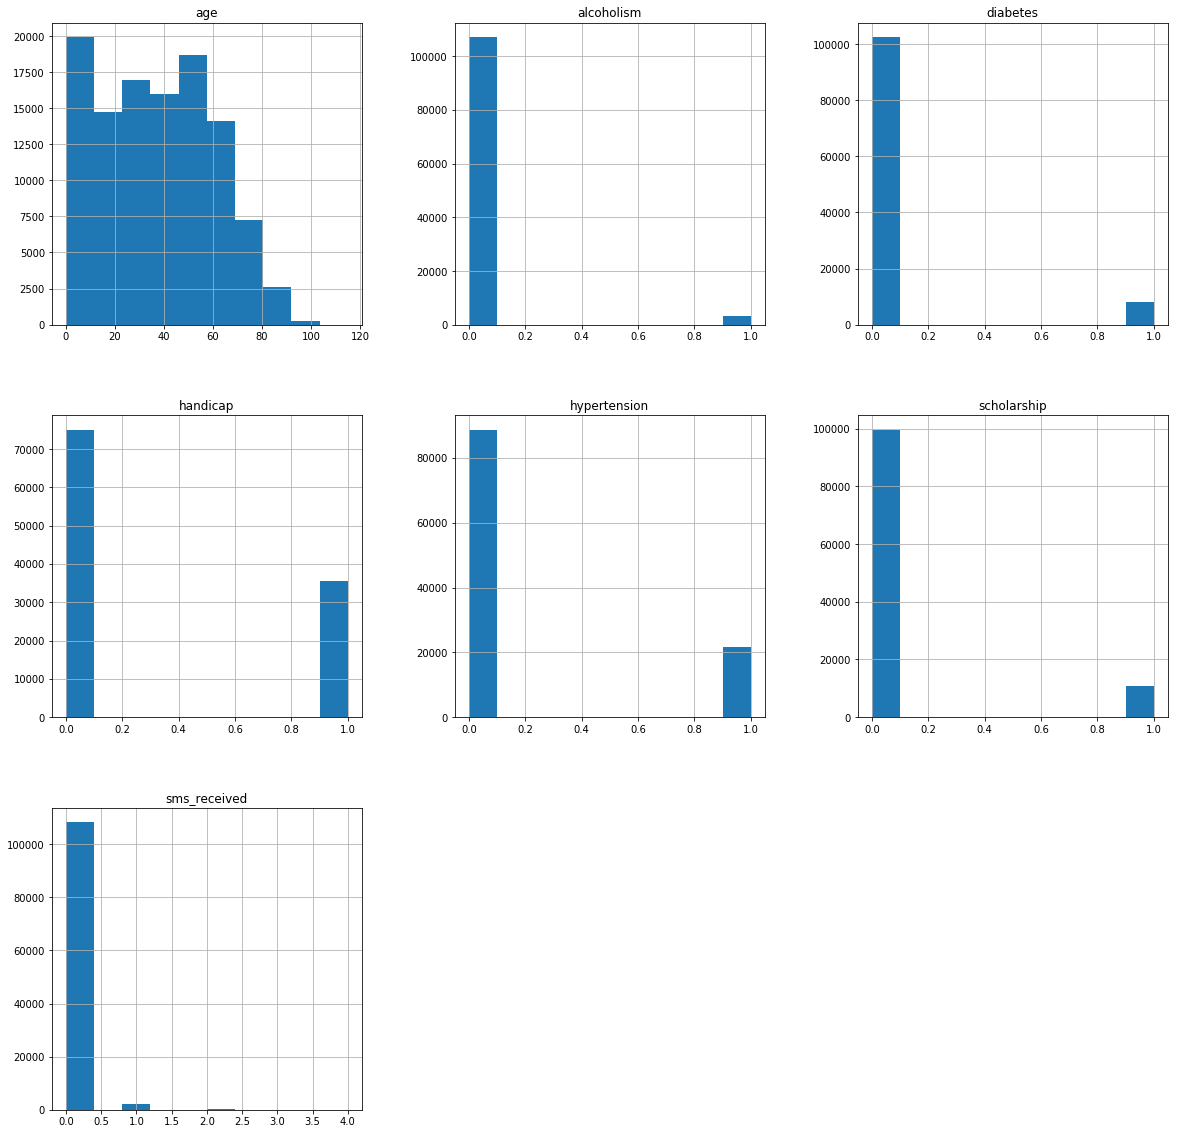

In [32]:
# Explore the features of data and its attributes using Descriptive Statistics.

df.hist(figsize=(20,20));

In [33]:
# Explore the precentage of no-show appointments.
no_show_percent = df.no_show.value_counts()['Yes']/df.no_show.value_counts().sum()
show_percent = df.no_show.value_counts()['No']/df.no_show.value_counts().sum()
print(no_show_percent, show_percent)

0.20193438647919945 0.7980656135208005


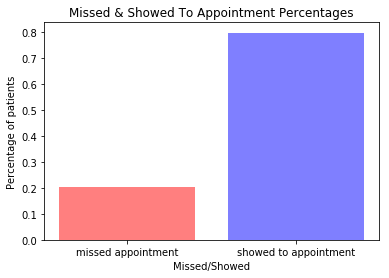

In [34]:
# Visualize your findings
bar_chart([no_show_percent, show_percent],["missed appointment","showed to appointment"],['red','blue'],0.5,"Missed & Showed To Appointment Percentages","Missed/Showed","Percentage of patients")

*As we can see from the previous plots, the percentage of people who missed their appointment was 20%.*

### Research Question 2  (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

F    14594
M     7725
Name: gender, dtype: int64


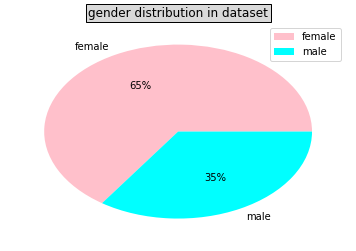

In [35]:
# Explore trends in data to find out if it's possible to predict if someone will not show to an appointment.
# Exploring the correlation between 'gender' and missing appointments.
gender = df.query('no_show == "Yes"')['gender'].value_counts()
print(gender)
pie_chart(gender,['female','male'],['pink','cyan'],1,'gender distribution in dataset')

*Among the patients who didn't show up, the percetange of females is higher than males, It's clear that most of the patients wh missed the appointment were females.*

0    21642
1      677
Name: alcoholism, dtype: int64


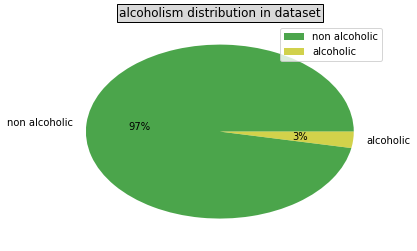

In [36]:
# Exploring the correlation between 'alcoholism' and missing appointments.
alcoholism = df.query('no_show == "Yes"')['alcoholism'].value_counts()
print(alcoholism)
pie_chart(alcoholism,['non alcoholic','alcoholic'],['g','y'],0.7,'alcoholism distribution in dataset')

*Among the patients who didn't show up, the percetange of alcoholic people is so low, that we can state that this factor has no much effect to the descision of the patient.*

0    12535
1     9784
Name: handicap, dtype: int64


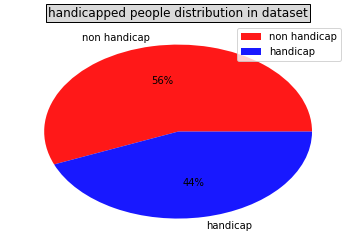

In [37]:
# Exploring the correlation between being 'handicap' and missing appointments.
handicap = df.query('no_show == "Yes"')['handicap'].value_counts()
print(handicap)
pie_chart(handicap,['non handicap','handicap'],['r','b'],0.9,'handicapped people distribution in dataset')

*Among the patients who didn't show up, the percetange of handicapped people is 44%, nearly half of them. which is something we can predict.*

**Although these previous results can be misleading, as we need to know the percent of each value to its total count, But we choose to investigate gender, alcoholisim and handicaps.**

### Research Question 3 (What are the characteristics associated with no-show to appointments?)

>**Gender**

In [38]:
# Invistgating missed appointments /'gender' proportions.
# Get the sum of each gender.
sum_f = df.gender.value_counts()[0]
sum_m = df.gender.value_counts()[1]
print(sum_f, sum_m)

# Get the percentage of missing appointments for each gender.
f_percent = gender[0]/sum_f
m_percent = gender[1]/sum_m
print(f_percent, m_percent)

71839 38687
0.20314870752655242 0.19967947889471915


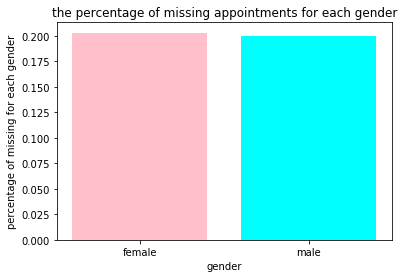

In [39]:
#Visualising the percentage of missing appointments for each gender.
bar_chart([f_percent, m_percent],["female","male"],['pink','cyan'],1,"the percentage of missing appointments for each gender","gender","percentage of missing for each gender")

*As we can see here, gender features isn't so helpful to predict if the person will show up to appointment or not. The both percentages of females and males that didn't show for the appointment are so close.*

### Research Question 4 (Does medical history, addiction and Handicapp affect the commitment to scheduled appointments?)

>**Alcoholism**

In [40]:
# Invistgating missed appointments /'alcoholism' proportions.
# Get the sum of each category.
sum_alc = df.alcoholism.value_counts()[1]
sum_non_alc = df.alcoholism.value_counts()[0]
print(sum_alc, sum_non_alc)

# Get the percentage of missing appointments for each category.
alc_percent = alcoholism[1]/sum_alc 
non_alc_percent = alcoholism[0]/sum_non_alc 
print(alc_percent, non_alc_percent)

3360 107166
0.20148809523809524 0.20194837915010358


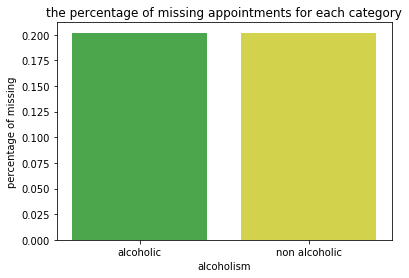

In [41]:
#Visualising the percentage of missing appointments for each category.
bar_chart([alc_percent, non_alc_percent],["alcoholic","non alcoholic"],['g','y'],0.7,"the percentage of missing appointments for each category","alcoholism","percentage of missing")

*Apparently, the percentage of non alcoholic people who are showing to appointment exceeds this of alcoholic people, with a slight difference that doesn't make variable a certain factor when it comes to predicting whether the patient will show at the appointment or not.*

>**Handicap**

In [42]:
# Invistgating missed appointments /being'handicap' proportions.
# Get the sum of each category.
sum_hc = df.handicap.value_counts()[1]
sum_non_hc = df.handicap.value_counts()[0]
print(sum_hc, sum_non_hc)

# Get the percentage of missing appointments for each category.
hc_percent = gender[1]/sum_hc
non_hc_percent = gender[0]/sum_non_hc
print(hc_percent, non_hc_percent)

35482 75044
0.21771602502677415 0.19447257608869464


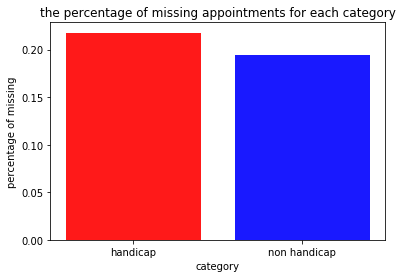

In [43]:
#Visualising the percentage of missing appointments for each gender.
bar_chart([hc_percent, non_hc_percent],["handicap","non handicap"],['r','b'],0.9,"the percentage of missing appointments for each category","category","percentage of missing")

*As we can expect, the percentage of handicapped people that missed the appointment is more that the percentage of non handicapped.
Handicapped people seem to be struggling to show on time for the appointment*

<a id='conclusions'></a>
## Conclusions
**research question : 
How many people miss their medical appointments?**  
> answer
- on the contrary of expectations, only 20% of people miss their appointments.

**research question 2 :
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?**
> answer
- we choose to investigate gender, alcoholisim and handicaps. according to kaggle, woman takes way more care of they health in comparison to man. but according to findings done on this analysis, the percentage of no show to appointments is very similar between women and men. actually women exceed men!

**research question 3 :
What are the characteristics associated with no-show to appointments?**
> answer
- after investigation we concluded that we can't use gender to predict if the person will show up to appointment or not.

**research question 4 :
Does medical history, addiction and special disabilities affect the commitment to scheduled appointments?**
>answer
- after investigating alcoholism and handicap characteristics we concluded that alcoholism defied expectation and again as females, non alcoholic people percentage showing to appointment exceeds alcoholic people.
- but handicap people seem to struggle to make it appointments.

## Limitations :
**During the analysis, some problems have been noticed in the data set:**
> **Unsufficient data:**
- *'alcoholism' , 'diabetes', 'hypertension'*, We thought those columns were not of much value. When it comes to predicting whether the patient will come or not, data like "Where does the patient live" or "How far does the patient live from the hospital" would have been more useful and directing us to the right way towards our goal. However, these factors won't have a big effect on the fact that the patient will miss the appointment or not.

>**Age:** 
- The age column contained a value '0' for many patients, although it is not logical, we supposed that it was meant to be for the babies who didn't complete there 1st year yet. We became sure this was the meaning of '0' value when we checked the crossponding alcoholism value, which by logic will give a value of '0' for all the cases as a baby woud never have a health problem due to alcohol drinking, and it was true, all the values of '0' iin age column had value of '0' in alcoholism column.


## Submitting your Project 

In [44]:
#create a .html or .pdf version of this notebook in the workspace here
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0